In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# display all columns of dataframe
pd.set_option('display.max_columns', 500)

# Suppress warning
import warnings
warnings.filterwarnings('ignore')

In [49]:
train_df = pd.read_csv('./data/train.csv', index_col = 0)
test_df = pd.read_csv('./data/test.csv', index_col = 0)

full_data = [train_df, test_df]

combine = pd.concat(full_data)
combine_c = combine.copy()

In [235]:
##
# train_df.groupby(['TotRmsAbvGrd', 'no_of_fl']).mean()['SalePrice']

TotRmsAbvGrd  no_of_fl
2             1            39300.000000
3             1           113137.500000
              2            80500.000000
4             1           118616.390244
              2           145959.000000
5             1           142614.769231
              2           135478.048780
6             1           166889.554386
              2           147695.743590
7             1           224750.553191
              2           175603.957447
8             1           243300.416667
              2           203111.712230
9             1           271969.583333
              2           249372.666667
10            1           258011.111111
              2           305342.657895
11            1           611657.000000
              2           300749.352941
12            2           280971.454545
14            2           200000.000000
Name: SalePrice, dtype: float64

In [222]:
# def check_flrs(flSF):
#     if flSF == 0:
#         return 1
#     else:
#         return 2
    
    
# train_df = train_df.assign(no_of_fl = train_df['2ndFlrSF'].apply(check_flrs))

In [4]:
print(train_df.shape)
print(test_df.shape)
print(combine_c.shape)

(1460, 80)
(1459, 79)
(2919, 80)


In [50]:
combine_c.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

# Seperating Columns

In [51]:
cat_features = combine.dtypes[combine.dtypes == 'object'].index
num_features = combine.dtypes[combine.dtypes != 'object'].index
print(cat_features)
print(num_features)

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')
Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSu

In [52]:
cat_extra = ['MSSubClass', 'OverallCond', 'OverallQual']
combine[cat_extra] = combine[cat_extra].astype('object')

In [53]:
cat_features = combine.dtypes[combine.dtypes == 'object'].index
num_features = combine.dtypes[combine.dtypes != 'object'].index
#print(cat_features)
#print(num_features)
print('No of categorical features',len(cat_features))
print('No of numerical features',len(num_features))

No of categorical features 46
No of numerical features 34


# Data Cleaning

Check for NAs

In [54]:
# to check Nans in  df
mask_tr = combine.isna().sum()
mask_tr[mask_tr>0]


Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64


# Impute Function

In [55]:
# define function to impute missing value
def impute_missing(dfName):
    
    # impute Continous numeric Variables   
    dfName['GarageYrBlt'] = dfName['GarageYrBlt'].fillna(min(dfName['GarageYrBlt']))
    dfName['LotFrontage'] = dfName.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    
    # impute 0
    for col in num_features:
        dfName[col].fillna(0, inplace = True)
    
    dfName['Functional'] = dfName['Functional'].fillna('Typ')
    
   # impute categorical variable missing not at Random with the mode value  
    for col in ('Electrical','MSZoning' , 'Exterior1st', 'Exterior2nd','KitchenQual', 'SaleType'):
        dfName[col].fillna(dfName[col].mode()[0], inplace = True)
  
    # impute None
    for col in cat_features:
        dfName[col].fillna('None', inplace = True)
        

In [56]:
#impute
impute_missing(combine)

In [57]:
# to check Nans after imputing
mask_tr = combine.isna().sum()
mask_tr[mask_tr>0]

Series([], dtype: int64)

In [58]:
combine.SalePrice.sample(6)

Id
1966         0.0
2447         0.0
1060    220000.0
841     140000.0
1957         0.0
143     166000.0
Name: SalePrice, dtype: float64

# Dummify

In [59]:
combine = pd.get_dummies(combine, drop_first=True)

In [60]:
combine.sample(6)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_Co

# Split dataframe

In [61]:
train = combine[combine.SalePrice!=0]
test = combine[combine.SalePrice==0]

In [62]:
print(train.shape)
print(test.shape)

(1460, 261)
(1459, 261)


In [63]:
test.columns.tolist()

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'Alley_None',
 'Alley_Pave',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Gd',
 'BsmtCond_None',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtExposure_None',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_None',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'B

# Outliers

Defining function to plot Target against every input variable

In [19]:
numeric_cols = train_df.select_dtypes(['number']).columns
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [22]:
# creating a dataframe of continous variables

cont_df = train[ num_features]

In [20]:
def find_outliers(feature, target):
    fig, ax = plt.subplots()
    ax.scatter(x = feature, y = target)
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(feature.name, fontsize=13)
    plt.show()

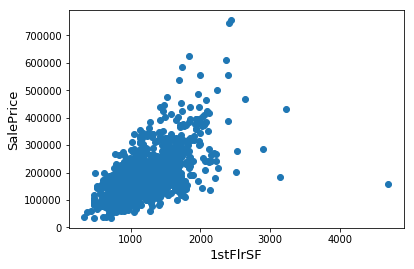

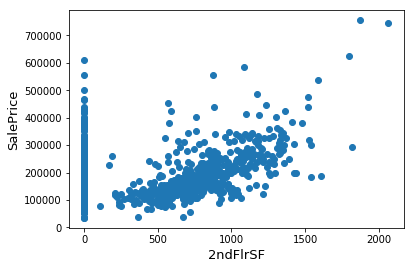

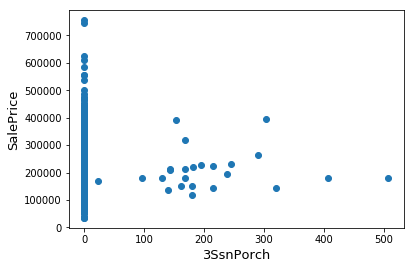

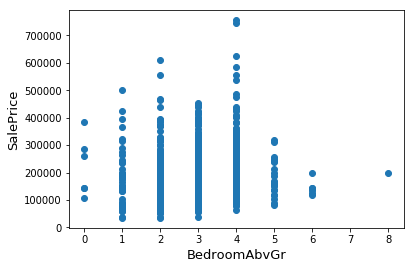

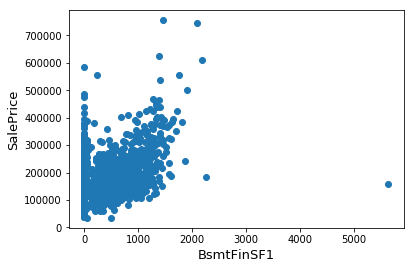

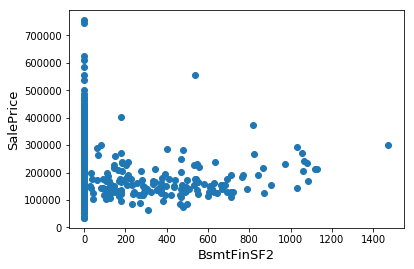

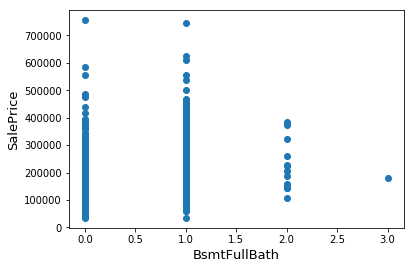

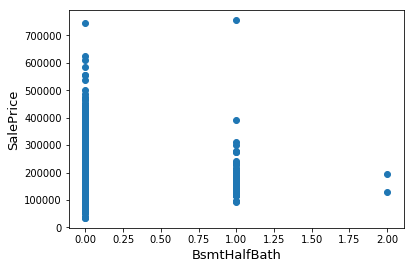

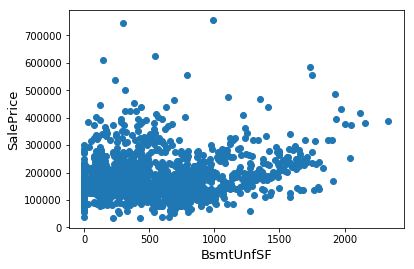

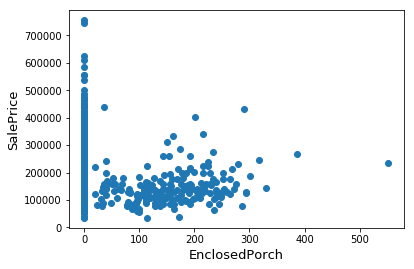

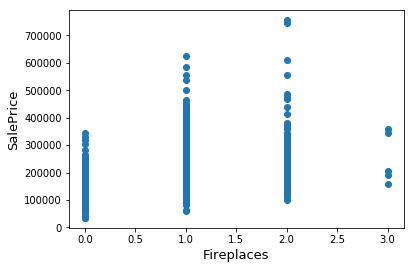

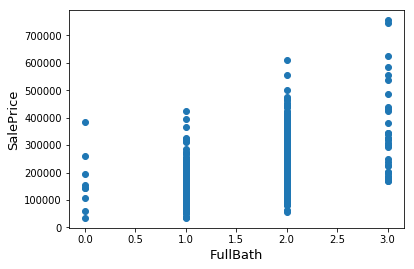

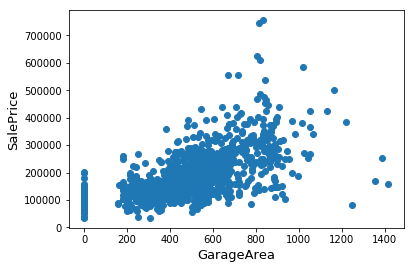

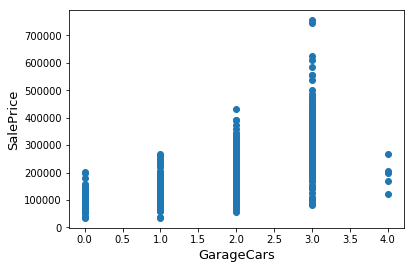

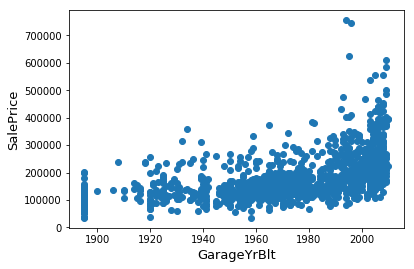

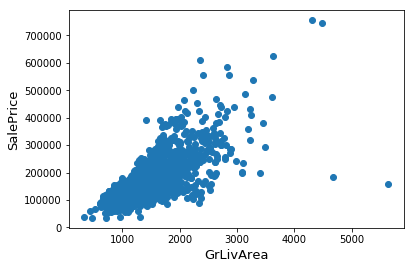

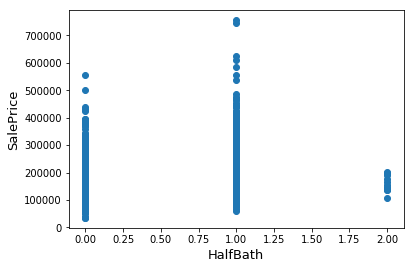

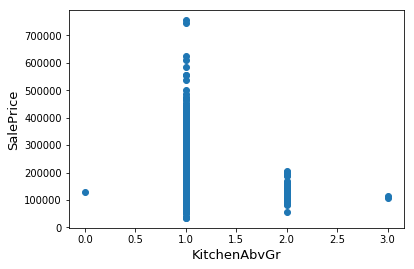

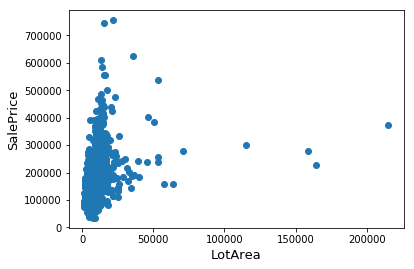

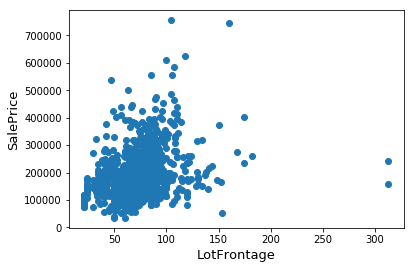

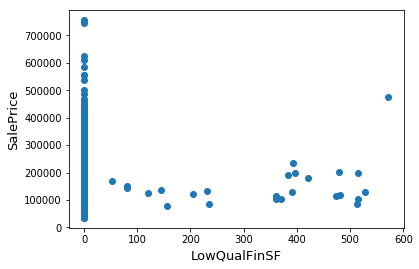

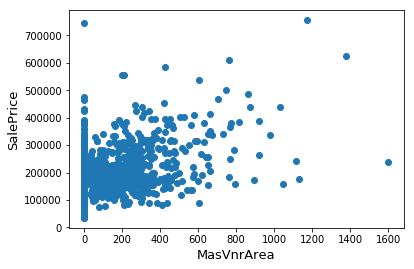

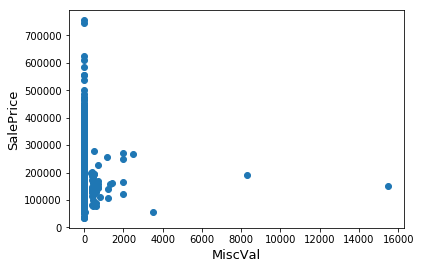

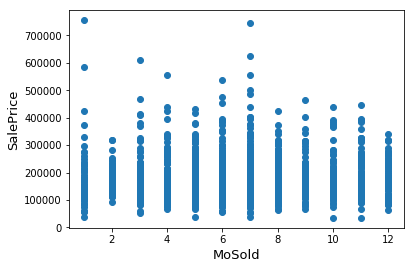

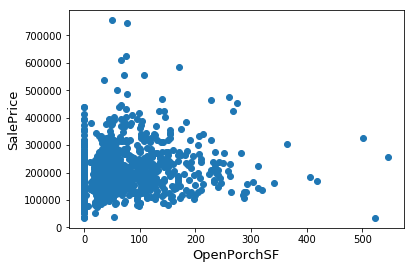

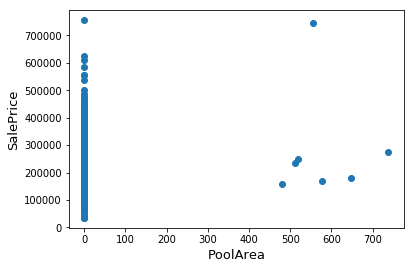

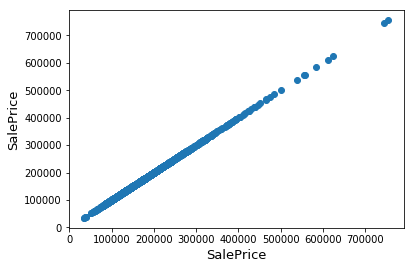

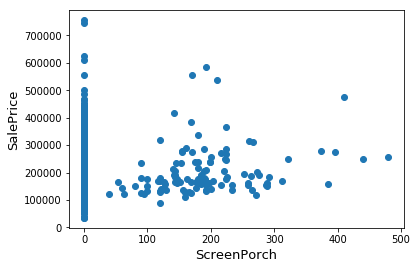

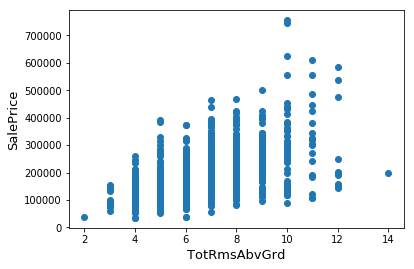

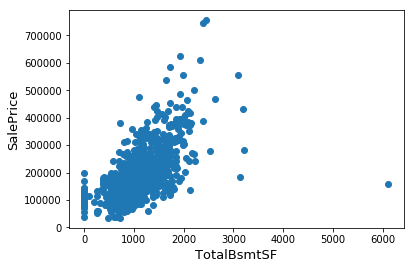

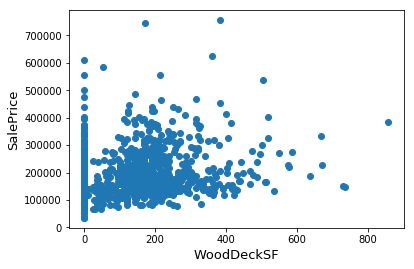

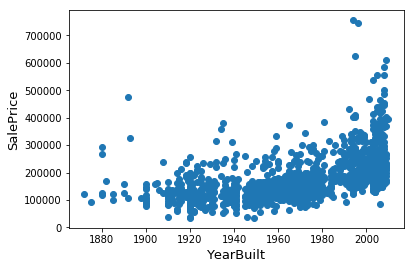

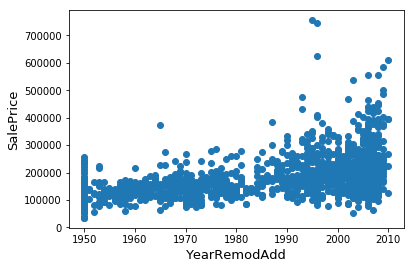

In [23]:
i=0
for i in range(len(cont_df.columns)-1):
    find_outliers(cont_df.iloc[:,i], cont_df.SalePrice)

In [64]:
cont_df.corr()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1stFlrSF,1.000000,-0.202646,0.056104,0.127401,0.445863,0.097117,0.244671,0.001956,0.317987,-0.065292,0.410531,0.380637,0.489782,0.439317,0.274127,0.566024,-0.119916,0.068101,0.299475,0.433014,-0.014241,0.339850,-0.021096,0.031372,0.211671,0.131525,0.605852,0.088758,0.409516,0.819530,0.235459,0.281986,0.240379,-0.013604
2ndFlrSF,-0.202646,1.000000,-0.024358,0.502901,-0.137079,-0.099260,-0.169494,-0.023855,0.004469,0.061989,0.194561,0.421378,0.138347,0.183926,0.092113,0.687501,0.609707,0.059306,0.050986,0.072527,0.063353,0.173800,0.016197,0.035164,0.208026,0.081487,0.319334,0.040606,0.616423,-0.174512,0.092165,0.010308,0.140024,-0.028700
3SsnPorch,0.056104,-0.024358,1.000000,-0.024478,0.026451,-0.029993,-0.000106,0.035114,0.020764,-0.037305,0.011257,0.035353,0.035087,0.035765,0.035977,0.020643,-0.004972,-0.024600,0.020423,0.063128,-0.004296,0.019144,0.000354,0.029474,-0.005842,-0.007992,0.044584,-0.031436,-0.006683,0.037384,-0.032771,0.031355,0.045286,0.018645
BedroomAbvGr,0.127401,0.502901,-0.024478,1.000000,-0.107355,-0.015728,-0.150673,0.046519,0.166643,0.041570,0.107570,0.363252,0.065253,0.086106,-0.051281,0.521270,0.226651,0.198597,0.119690,0.243940,0.105607,0.102775,0.007767,0.046544,0.093810,0.070703,0.168213,0.044300,0.676620,0.050450,0.046854,-0.070651,-0.040581,-0.036014
BsmtFinSF1,0.445863,-0.137079,0.026451,-0.107355,1.000000,-0.050117,0.649212,0.067418,-0.495251,-0.102303,0.260011,0.058543,0.296970,0.224054,0.184906,0.208171,0.004262,-0.081007,0.214103,0.233121,-0.064503,0.261256,0.003571,-0.015727,0.111761,0.140491,0.386420,0.062021,0.044316,0.522396,0.204306,0.249503,0.128451,0.014359
BsmtFinSF2,0.097117,-0.099260,-0.029993,-0.015728,-0.050117,1.000000,0.158678,0.070948,-0.209294,0.036543,0.046921,-0.076444,-0.018227,-0.038264,-0.043373,-0.009640,-0.032148,-0.040751,0.111170,0.054415,0.014807,-0.071330,0.004940,-0.015211,0.003093,0.041709,-0.011378,0.088871,-0.035227,0.104810,0.067898,-0.049107,-0.067759,0.031706
BsmtFullBath,0.244671,-0.169494,-0.000106,-0.150673,0.649212,0.158678,1.000000,-0.147871,-0.422900,-0.049911,0.137928,-0.064512,0.179189,0.131881,0.120567,0.034836,-0.030905,-0.041503,0.158155,0.108217,-0.047143,0.083010,-0.023047,-0.025361,0.067341,0.067616,0.227122,0.023148,-0.053275,0.307351,0.175315,0.187599,0.119470,0.067049
BsmtHalfBath,0.001956,-0.023855,0.035114,0.046519,0.067418,0.070948,-0.147871,1.000000,-0.095804,-0.008555,0.028976,-0.054536,-0.024536,-0.020891,-0.045786,-0.018918,-0.012340,-0.037944,0.048046,0.006486,-0.005842,0.027403,-0.007367,0.032873,-0.025324,0.020025,-0.016844,0.032121,-0.023836,-0.000315,0.040161,-0.038162,-0.012337,-0.046524
BsmtUnfSF,0.317987,0.004469,0.020764,0.166643,-0.495251,-0.209294,-0.422900,-0.095804,1.000000,-0.002538,0.051575,0.288886,0.183303,0.214175,0.166055,0.240257,-0.041118,0.030086,-0.002618,0.118330,0.028167,0.113862,-0.023837,0.034888,0.129005,-0.035092,0.214479,-0.012579,0.250647,0.415360,-0.005316,0.149040,0.181133,-0.041258
EnclosedPorch,-0.065292,0.061989,-0.037305,0.041570,-0.102303,0.036543,-0.049911,-0.008555,-0.002538,1.000000,-0.024822,-0.115093,-0.121777,-0.151434,-0.262079,0.009113,-0.095317,0.037312,-0.018340,0.005993,0.061081,-0.109907,0.018361,-0.028887,-0.093079,0.054203,-0.128578,-0.082864,0.004151,-0.095478,-0.125989,-0.387268,-0.193919,-0.009916


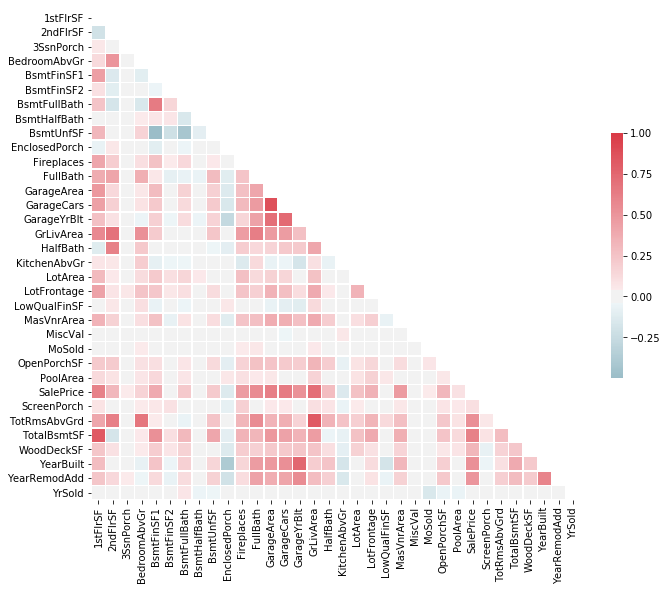

In [65]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

corr = cont_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Sale Price is strongly correlated with these continous variable, so we will eliminate outliers from these

Predictor : Correlation with Price
------------------------------------------------

GrLivArea :    0.708624

GarageCars : 0.640409

GarageArea:   0.623431

TotalBsmtSF : 0.613581 

1stFlrSF  :  0.605852

TotRmsAbvGrd :   0.533723

FullBath  :  0.560664  



Following are the two outliers which might effect out prediction

In [66]:
train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_Co

Dropping the outliers brought in by variable GrLivArea

In [67]:
train = train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index)

train.shape

(1458, 261)

Checking the plots after dropping the outlier

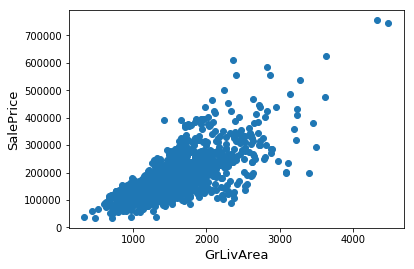

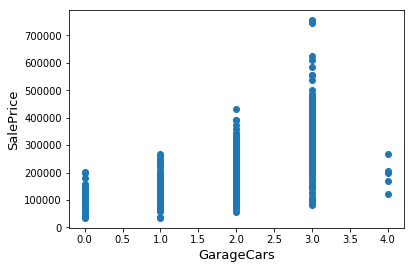

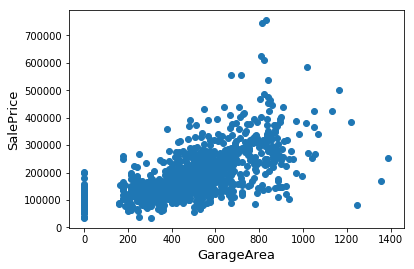

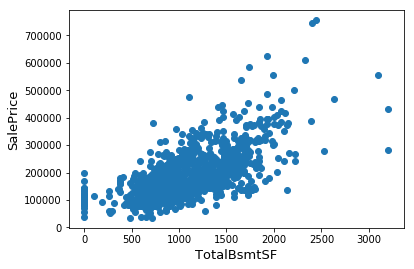

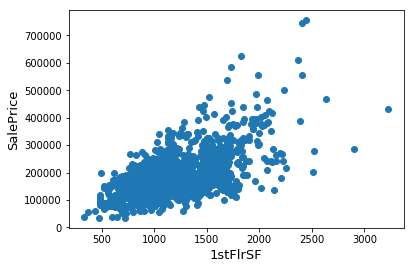

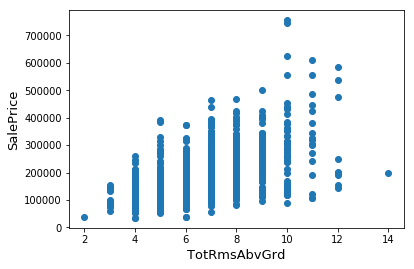

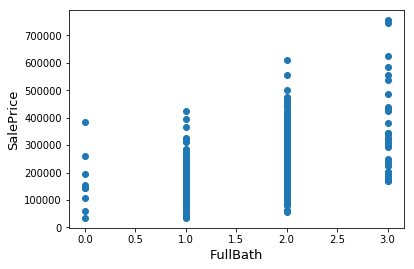

In [280]:
cont_df = train_df[[ 'LotFrontage', 'LotArea',  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                  'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                   'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                   'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                   'MoSold', 'SalePrice']]

find_outliers(cont_df.GrLivArea, cont_df.SalePrice)
find_outliers(cont_df.GarageCars, cont_df.SalePrice)
find_outliers(cont_df.GarageArea, cont_df.SalePrice)
find_outliers(cont_df.TotalBsmtSF, cont_df.SalePrice)
find_outliers(cont_df['1stFlrSF'], cont_df.SalePrice)
find_outliers(cont_df.TotRmsAbvGrd, cont_df.SalePrice)
find_outliers(cont_df.FullBath, cont_df.SalePrice)


Following observation shows outlier brought in by Garage Area, its detached garage where GrLivArea is only 894 , year built = 1935 for which such a low sale Price $81000 makes sense, so we are not dropping this outlier

In [281]:
train[(train.GarageArea>1200) & (train.SalePrice<100000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000


# Feature Engineering

# Analysis of Target variable

We want to predict SalePrice. Let's check the distribution of target variable


 mu = 180932.92 and sigma = 79467.79



Text(0.5, 1.0, 'Distribution of Sale Price')

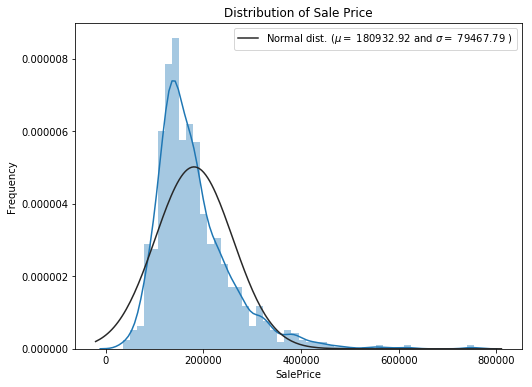

In [144]:
plt.figure(figsize = (8,6))

sns.distplot(train.SalePrice, bins=50, fit= stats.norm);

# Get the fitted parameters used by the function
(mean, sd) = stats.norm.fit(train.SalePrice)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mean, sd))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, sd)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')

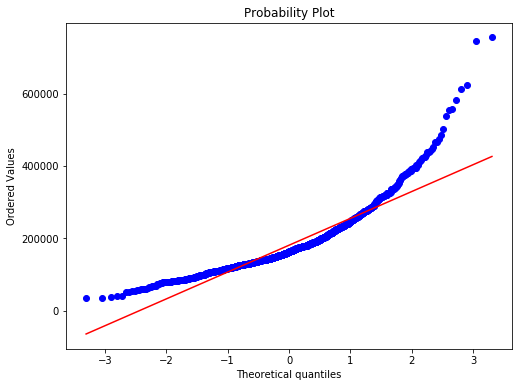

In [145]:
# Q Q plot
plt.figure(figsize = (8,6))
stats.probplot(train.SalePrice, plot=plt)
plt.show()

The Sale price follows normal distribution but has a right skew. As the Q Q plot shows, its following the law of linearity but needs improvement. Let's check what it looks like after transformation

# Transformation of target variable


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'Distribution of Sale Price')

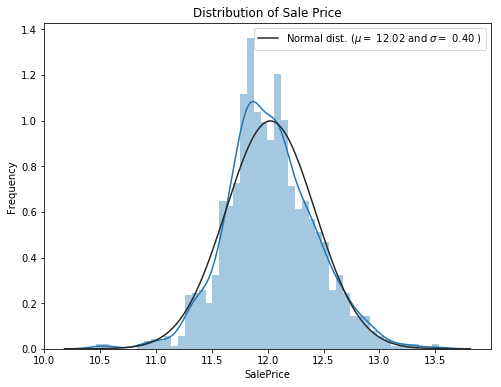

In [68]:
train.SalePrice = np.log(train.SalePrice)

plt.figure(figsize = (8,6))

sns.distplot(train.SalePrice, bins=50, fit= stats.norm);

# Get the fitted parameters used by the function
(mean, sd) = stats.norm.fit(train.SalePrice)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mean, sd))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, sd)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')



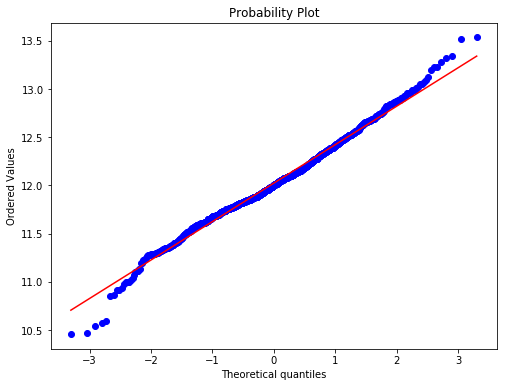

In [29]:

# Q Q plot
plt.figure(figsize = (8,6))
stats.probplot(train.SalePrice, plot=plt)
plt.show()

As the plots shows log transforming the price gives better results, we will transform it back after prediction using np.exp

# Check for skewness in predictors

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002217693DE10>,
      dtype=object)

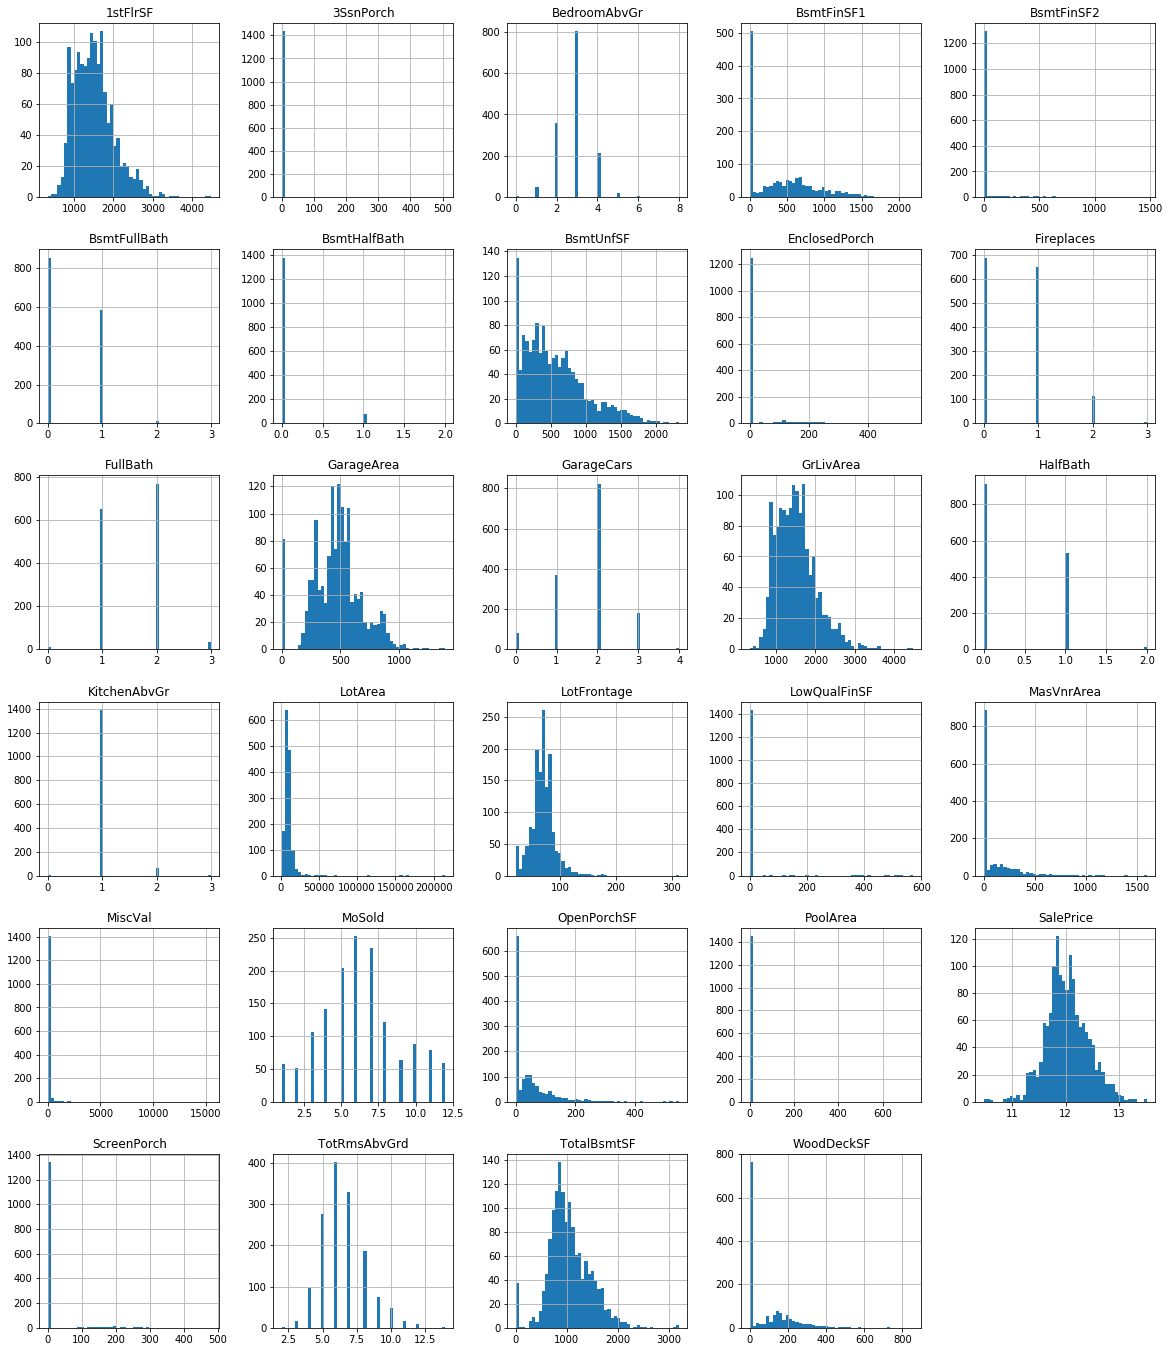

In [302]:
# run to check which variable needs transformation
train_df[[ 'LotFrontage', 'LotArea',  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                  'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
          #'2ndFlrSF', 
          'LowQualFinSF',
                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                   'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                   'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                   'MoSold', 'SalePrice']].hist(bins = 50, figsize = (20,24))

Transform 1stFlSF and 2ndFlSF into 1 column and add no_of_fl column as 1/2 as identifier

In [295]:
# run following line once it adds second floor SF to first FL sq rerunning will add it again
# train_df['1stFlrSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] 
# train_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,no_of_fl
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,1710,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247694,2
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109011,1
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,1786,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317167,2


In [298]:
# dropping 2ndFlrSF because its already accounted in 1stFlr variable
# train_df = train_df.drop(['2ndFlrSF'], axis=1)

 ## Add the square foots

In [72]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

In [73]:
train.shape

(1458, 262)

In [74]:
test.shape

(1459, 262)

In [46]:
test.columns.tolist()

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'Alley_None',
 'Alley_Pave',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Gd',
 'BsmtCond_None',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtExposure_None',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_None',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'B

1. BsmtFinSF1 + BsmtFinSF2, gives the same information as TotalBsmtSF, so BsmtFinSF1 , BsmtFinSF2 its not adding any value , we can drop them 
2. 'TotalBsmtSF','1stFlrSF','2ndFlrSF' can be dropped beacause we already added new feature 'TotalSF' which account for these
3. Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" .This feature won't help in predictive modelling. We can then drop it.

In [47]:
# As learnt from this experiment droppig features is leading to worse predictions, we will kepp these features

# train.drop(columns = ['BsmtFinSF1','BsmtFinSF2', 'TotalBsmtSF','1stFlrSF','2ndFlrSF','Utilities_NoSeWa','Utilities_None'], inplace=True)
# test.drop(columns = ['BsmtFinSF1','BsmtFinSF2', 'TotalBsmtSF','1stFlrSF','2ndFlrSF','Utilities_NoSeWa','Utilities_None'], inplace=True)



In [76]:
train.drop(columns = ['Utilities_NoSeWa','Utilities_None'], inplace=True)

    
test.drop(columns = ['Utilities_NoSeWa','Utilities_None'], inplace=True)

In [77]:
print(train.shape)
test.shape

(1458, 260)


(1459, 260)

# Modelling

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso, Ridge, ElasticNet, HuberRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline, Pipeline

from xgboost.sklearn import XGBRegressor

import xgboost as xgb

In [88]:
lasso = Lasso()
ridge = Ridge()
net = ElasticNet()
hub = HuberRegressor()
xgb_reg = XGBRegressor()

In [80]:
#split train data
X = train.drop('SalePrice', 1)
y = train.SalePrice

In [81]:
test = test.drop('SalePrice', 1)

## XGBoost

In [ ]:
parameters = {'nthread':[-1], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500],
              'alpha': list(np.linspace(1e-10,100,10)),
              'gamma': list(np.linspace(1e-10,100,10)),
              'lambda': list(np.linspace(1e-10,100,10))}

cv_xgb = GridSearchCV(xgb_reg,
                        parameters,
                        cv = 10,
                        n_jobs = 5,
                        verbose=True)

cv_xgb.fit(X,y)
print(cv_xgb.best_params_)
print(cv_xgb.best_score_)


Fitting 10 folds for each of 9000 candidates, totalling 90000 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  4.7min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 11.1min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 19.8min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed: 32.5min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 52.1min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 69.1min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 91.2min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 115.9min
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed: 155.0min
[Parallel(n_jobs=5)]: Done 6040 tasks      | elapsed: 182.8min
[Parallel(n_jobs=5)]: Done 7190 tasks      | elapsed: 212.7min
[Parallel(n_jobs=5)]: Done 8440 tasks      | elapsed: 274.5min
[Parallel(n_jobs=5)]: Done 9790 tasks      | elapsed: 307.0min
[Parallel(n_jobs=5)]: Done 11240 tasks      | elapsed: 

In [ ]:
cv_xgb.set_params()

In [ ]:
xgb_grid.fit(x_train_full,
         y_train_full)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

## Ridge

In [82]:
#grid search

param_grid = [
  {'alpha': list(np.linspace(1e-10,100,10))}
 ]

cv_ridge = GridSearchCV(ridge, param_grid, cv=10, n_jobs=-1)
cv_ridge.fit(X,y)
print(cv_ridge.best_params_)
print(cv_ridge.best_score_)

{'alpha': 11.1111111112}
0.9174950126032989


In [83]:
ridge.set_params(alpha = 11.1111111112)
ridge.fit(X,y)
y_pred = np.exp(ridge.predict(test))
y_pred

array([114144.31880194, 152304.12130062, 180057.69655686, ...,
       173456.10319588, 112751.08445323, 223675.78610926])

## Lasso

In [188]:
#grid search

param_grid = [
  {'alpha': list(np.linspace(1e-10,100,10))}
 ]

cv_lasso = GridSearchCV(lasso, param_grid, cv=10, n_jobs=-1)
cv_lasso.fit(X,y)
print(cv_lasso.best_params_)
print(cv_lasso.best_score_)

{'alpha': 1e-10}
0.9080321827525965


In [189]:
lasso.set_params(alpha = 1e-10)
lasso.fit(X,y)
y_pred = np.exp(lasso.predict(test)) # this gives kaggle score of 0.14069,

(1458, 255)

## Huber

In [195]:
#grid search

param_grid = [
  {'alpha': list(np.linspace(1e-10,100,10))}
 ]

cv_huber = GridSearchCV(hub, param_grid, cv=10, n_jobs=-1)
cv_huber.fit(X,y)
print(cv_huber.best_params_)
print(cv_huber.best_score_)

{'alpha': 11.1111111112}
0.8280678176363235


In [196]:
hub.set_params(alpha = 11.1111111112)
hub.fit(X,y)
y_pred = np.exp(hub.predict(test)) # this gives kaggle score of 0.14069,

## Output

In [84]:
x = pd.concat([test.reset_index(), pd.Series(y_pred).rename('SalePrice')], axis=1)[['Id', 'SalePrice']].set_index('Id')
x.to_csv('price_ridge_may24.csv')

# Following steps are to plot log transformation to just use in slides

In [321]:
def check_skew(feature):
    plt.figure(figsize = (8,6))

    sns.distplot(train_df[feature], bins=50, fit= stats.norm)

    # Get the fitted parameters used by the function
    (mean, sd) = stats.norm.fit(train_df[feature])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mean, sd))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, sd)],
                loc='best')
    plt.ylabel('Frequency')


 mu = 1510.47 and sigma = 507.70


 mu = 10459.94 and sigma = 9855.82


 mu = 69.99 and sigma = 21.46


 mu = 1504.61 and sigma = 503.17



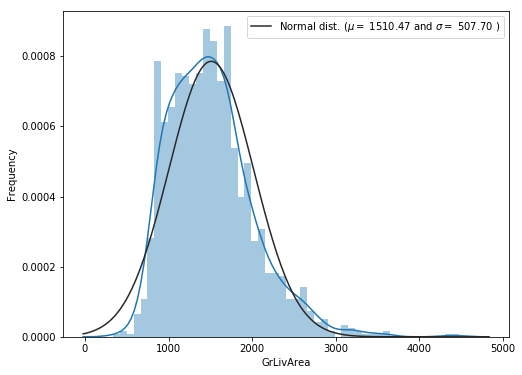

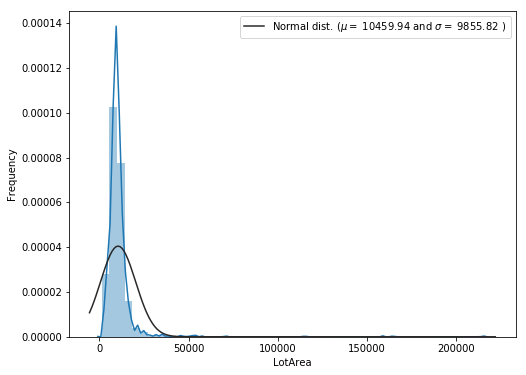

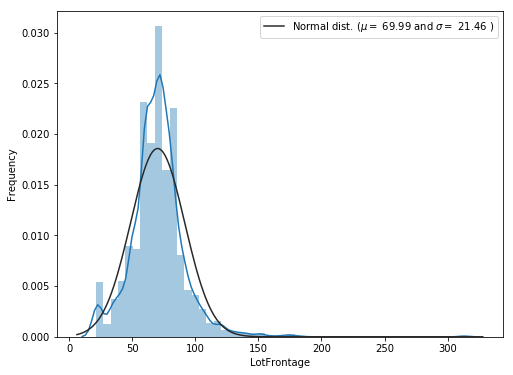

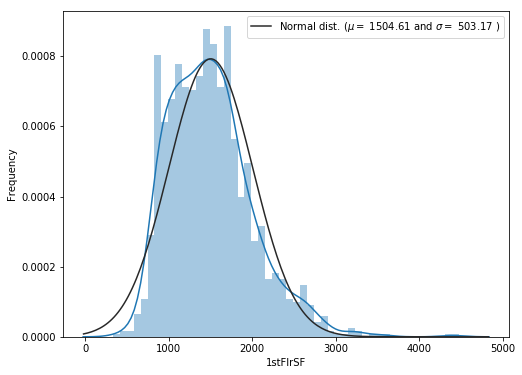

In [322]:
for col in ('GrLivArea','LotArea','LotFrontage', '1stFlrSF'):
    check_skew(col)

# Applying log transformation 

In [324]:
def log_transform(feature):
    
    train_df[feature] = np.log(train_df[feature])
    
    plt.figure(figsize = (8,6))

    sns.distplot(train_df[feature], bins=50, fit= stats.norm)

    # Get the fitted parameters used by the function
    (mean, sd) = stats.norm.fit(train_df[feature])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mean, sd))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, sd)],
                loc='best')
    plt.ylabel('Frequency')


 mu = 7.27 and sigma = 0.33


 mu = 9.11 and sigma = 0.51


 mu = 4.20 and sigma = 0.33


 mu = 7.26 and sigma = 0.33



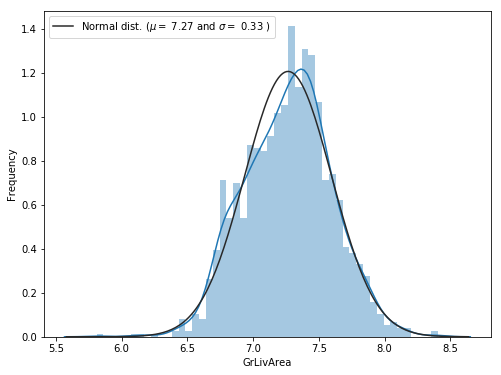

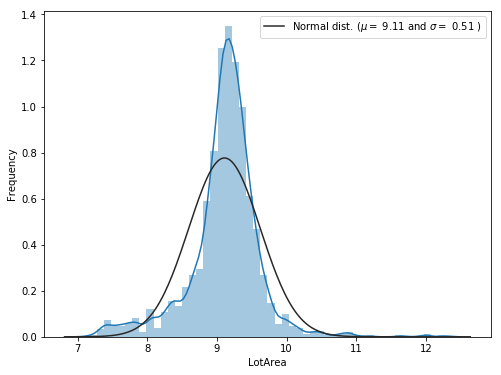

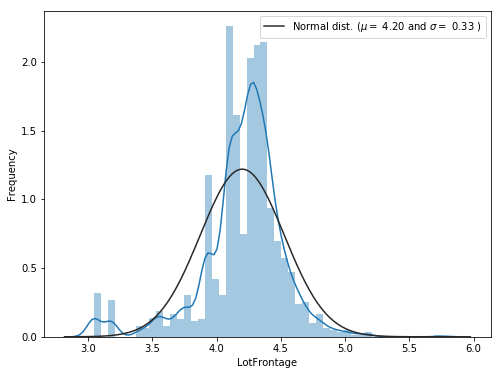

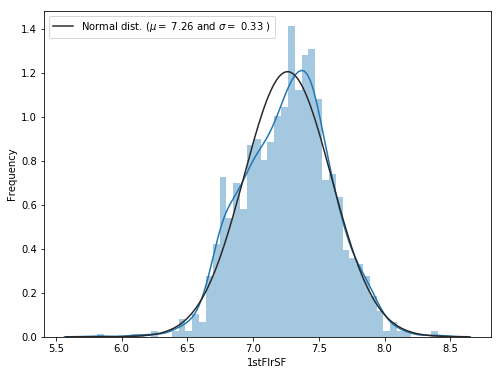

In [326]:
for col in ('GrLivArea','LotArea','LotFrontage', '1stFlrSF'):
    log_transform(col)

# log transform doesn't give much benefit, so we will revert it to original value

In [328]:
def revert_log(feature):
    train_df[feature] = np.exp(train_df[feature])
    
for col in ('GrLivArea','LotArea','LotFrontage', '1stFlrSF'):
    revert_log(col)    

In [329]:
train_df.sample(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,no_of_fl
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1016,60,RL,70.0,8400.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643,Unf,0,167,810,GasA,Ex,Y,SBrkr,1665.0,0,1665.0,1,0,2,1,3,1,Gd,6,Typ,0,None,Attchd,2001.0,Fin,2,528,TA,TA,Y,0,45,0,0,0,0,None,None,None,0,11,2009,WD,Normal,12.332705,2
1239,20,RL,63.0,13072.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1141,1141,GasA,Ex,Y,SBrkr,1141.0,0,1141.0,0,0,1,1,3,1,TA,6,Typ,0,None,Detchd,2005.0,Unf,2,484,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,3,2006,WD,Abnorml,11.867097,1
663,20,RL,120.0,13560.0,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,3,1968,1968,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,216.0,TA,TA,CBlock,Fa,Fa,No,Unf,0,Unf,0,1392,1392,GasA,Gd,Y,SBrkr,1392.0,0,1392.0,1,0,1,0,2,1,TA,5,Maj2,2,TA,Attchd,1968.0,RFn,2,576,TA,TA,Y,0,0,240,0,0,0,None,None,None,0,7,2009,WD,Normal,11.608236,1
261,80,RL,120.0,19296.0,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,SLvl,6,5,1962,1962,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,399.0,TA,TA,CBlock,TA,TA,Gd,Rec,672,ALQ,690,0,1362,GasA,TA,Y,SBrkr,1382.0,0,1382.0,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1991.0,Unf,2,884,TA,TA,Y,0,0,252,0,0,0,None,GdWo,None,0,5,2009,WD,Normal,12.078239,1
1011,50,RL,115.0,21286.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1.5Fin,5,5,1948,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,720,720,GasA,TA,Y,SBrkr,1271.0,0,1271.0,0,0,2,0,4,1,TA,7,Typ,1,Gd,Attchd,1948.0,Unf,1,312,TA,TA,Y,0,0,108,0,0,0,None,None,None,0,8,2008,WD,Normal,11.813030,2
855,20,RL,102.0,17920.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1955,1974,Hip,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,306,Rec,1085,372,1763,GasA,TA,Y,SBrkr,1779.0,0,1779.0,1,0,1,1,3,1,TA,6,Typ,1,Gd,Attchd,1955.0,Unf,2,454,TA,TA,Y,0,418,0,0,312,0,None,None,None,0,7,2006,WD,Abnorml,12.043554,1
